<a href="https://colab.research.google.com/github/kasassc/text-detection/blob/main/Text%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python pytesseract pillow
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot 2024-04-16 100752.png to Screenshot 2024-04-16 100752 (1).png


In [ ]:
import cv2
import numpy as np
from PIL import Image

# Get the image filename
filename = next(iter(uploaded))  # Automatically takes the uploaded file

# Read the image
image = cv2.imread(filename)

# Check if image loaded correctly
if image is None:
    print("Image not loaded. Please check the file format.")
else:
    print("Image loaded successfully!")


Image loaded successfully!


In [ ]:
import pytesseract

# Set the path to the Tesseract executable for Google Colab
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optional preprocessing
gray = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Run OCR
text = pytesseract.image_to_string(thresh)
print("Detected Text:\n")
print(text)


Detected Text:

VIVEKANANDA INSTITUTE OF LANGUAGES

Ramskrishes Moth, Hydershed
Exaesinstion Rewwles - January to March 2024

REGNNO OL24A0406
NAME _KASA SATHYA SARATH CHANDR:



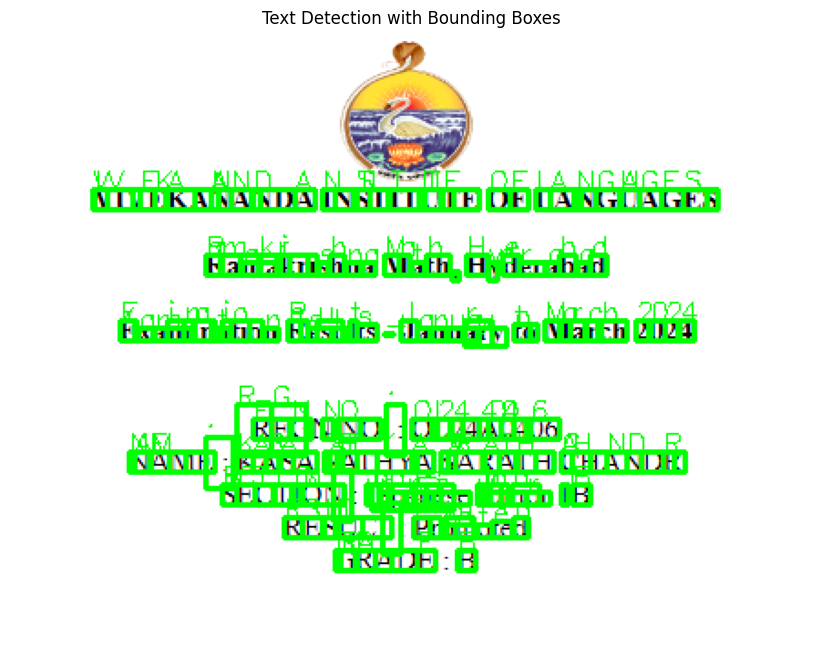

In [ ]:
import matplotlib.pyplot as plt

# Draw boxes around each detected character
h, w, _ = image.shape
boxes = pytesseract.image_to_boxes(image)

for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(image, (x, h - y2), (x2, h - y), (0, 255, 0), 2)
    cv2.putText(image, b[0], (x, h - y2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Convert BGR to RGB for matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Text Detection with Bounding Boxes')
plt.show()
